<h1 style="font-size: 40px; font-weight: bold">UK Road Accident Data Analysis</h1>
<h2>2019-2020</h2>


<h1 style="font-size: 35px; font-weight: bold;">#1. Data Preparation</h1>
<h2>Analyst: Aerbhert John Sanchez</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from IPython.display import display, HTML
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore")

In [2]:
def print(*args, sep=' ', end='\n', **kwargs):
    output = sep.join(map(str, args)) + end
    styled_output = f'<p style="font-size: 20px; font-weight: bold">{output}</p>'
    display(HTML(styled_output))

In [3]:
UK_accident = pd.read_csv('accident_data.csv')
UK_accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1 style="font-size: 35px; font-weight: bold";>#2 Data Cleansing</h1>

<p><strong>Clearing spaces and cleaning the date format</p>

In [4]:
UK_accident['Accident Date'] = UK_accident['Accident Date'].str.strip()
UK_accident['Accident Date'] = UK_accident['Accident Date'].str.replace("/","-")



<p><strong>Clearing Null Values<strong></p>

In [5]:
UK_accident['Latitude'].median()
UK_accident['Longitude'].median()
UK_accident['Road_Surface_Conditions'].mode()
UK_accident['Road_Type'].mode()
UK_accident['Urban_or_Rural_Area'].mode()

0    Urban
Name: Urban_or_Rural_Area, dtype: object

In [6]:
UK_accident['Latitude'] = UK_accident['Latitude'].fillna(UK_accident['Latitude'].median())
UK_accident['Longitude'] = UK_accident['Longitude'].fillna(UK_accident['Longitude'].median())
UK_accident['Road_Surface_Conditions'] = UK_accident['Road_Surface_Conditions'].fillna(UK_accident['Road_Surface_Conditions'].mode()[0])
UK_accident['Road_Type'] = UK_accident['Road_Type'].fillna('unknown road type')
UK_accident['Urban_or_Rural_Area'] = UK_accident['Urban_or_Rural_Area'].fillna(UK_accident['Urban_or_Rural_Area'].mode()[0])
UK_accident['Weather_Conditions'] = UK_accident['Weather_Conditions'].fillna('unknown weather condition')

In [7]:
UK_accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<p><strong>Changing Data Types<strong></p>

In [8]:
UK_accident['Accident_Severity'] = UK_accident['Accident_Severity'].astype("category")
UK_accident['Accident Date'] = pd.to_datetime(UK_accident['Accident Date'], dayfirst = True, errors="coerce")
UK_accident['Light_Conditions'] = UK_accident['Light_Conditions'].astype("category")
UK_accident['District Area'] = UK_accident['District Area'].astype("category")
UK_accident['Road_Surface_Conditions'] = UK_accident['Road_Surface_Conditions'].astype("category")
UK_accident['Road_Type'] = UK_accident['Road_Type'].astype("category")
UK_accident['Urban_or_Rural_Area'] = UK_accident['Urban_or_Rural_Area'].astype("category")
UK_accident['Weather_Conditions'] = UK_accident['Weather_Conditions'].astype("category")
UK_accident['Vehicle_Type'] = UK_accident['Vehicle_Type'].astype("category")
UK_accident['Latitude'] = UK_accident['Latitude'].astype("category")
UK_accident['Longitude'] = UK_accident['Longitude'].astype("category")

In [9]:
UK_accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<p><strong>Making the Date Divided in Different Formats</p>

In [10]:
UK_day= UK_accident['Day']= UK_accident['Accident Date'].dt.day
UK_month= UK_accident['Month']= UK_accident['Accident Date'].dt.month
UK_year= UK_accident['Year']= UK_accident['Accident Date'].dt.year
UK_week= UK_accident['DayOfWeek']= UK_accident['Accident Date'].dt.dayofweek

In [11]:
UK_month.value_counts().sort_values(ascending=False)

Accident Date
11    60424
10    59580
7     57445
6     56481
9     56455
5     56352
3     54086
8     53913
1     52872
12    51836
4     51744
2     49491
Name: count, dtype: int64

<h1 style="font-size: 35px; font-weight: bold";>#3. Insights</h1>

<p style="font-size: 17px; font-weight: bold;">1. What are the percentage of severity of UK accidents?</p>

In [12]:
severity = UK_accident['Accident_Severity']

In [13]:
severity.value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [14]:
slight_severity= (severity == "Slight").sum()
serious_severity= (severity == "Serious").sum()
fatal_severity= (severity == "Fatal").sum()

In [15]:
sum_of_all_accidents = slight_severity + serious_severity + fatal_severity

In [16]:
percent_slight = np.round(slight_severity / sum_of_all_accidents,3) * 100
percent_serious = np.round(serious_severity / sum_of_all_accidents,3) * 100
percent_fatal = np.round(fatal_severity / sum_of_all_accidents,3) * 100

In [17]:
print(f"The severity of accidents in the UK is distributed as follows: "
      f"Slight: {percent_slight}%, Serious: {percent_serious}%, Fatal: {percent_fatal}%. "
    f"Making slight accidents are most common.")

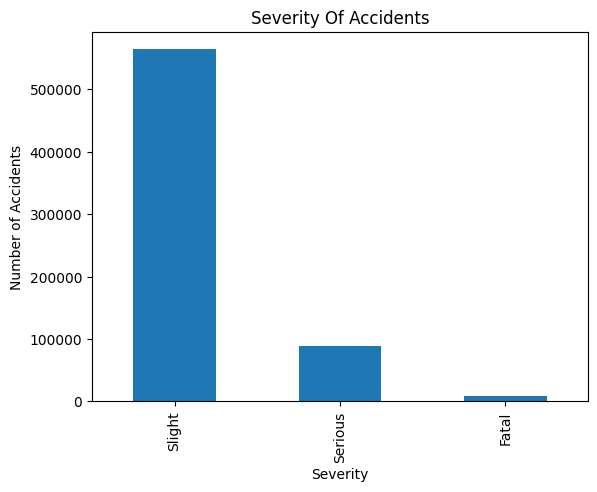

In [18]:
graph_severity = UK_accident['Accident_Severity'].value_counts()

graph_severity.plot(kind="bar")
plt.title("Severity Of Accidents")
plt.ylabel("Number of Accidents")
plt.xlabel("Severity")
plt.show()

<div style="width: 100%; height: 20px; background-color: green;"></div>

<p style="font-size: 17px; font-weight: bold;">2. What is the percentage of severity of accidents per vehicles?</p>

In [19]:
vehicles = UK_accident["Vehicle_Type"]

In [20]:
vehicles.value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

In [21]:
vehicle_car = (UK_accident["Vehicle_Type"] == "Car").sum()
vehicle_van = (UK_accident["Vehicle_Type"] == "Van / Goods 3.5 tonnes mgw or under").sum()
vehicle_bus = (UK_accident["Vehicle_Type"] == "Bus or coach (17 or more pass seats)").sum()
vehicle_motor_500 = (UK_accident["Vehicle_Type"] == "Motorcycle over 500cc").sum()
vehicle_goods_7_5 = (UK_accident["Vehicle_Type"] == "Goods 7.5 tonnes mgw and over").sum()
vehicle_motor_125_down = (UK_accident["Vehicle_Type"] == "Motorcycle 125cc and under").sum()
vehicle_taxi = (UK_accident["Vehicle_Type"] == "Taxi/Private hire car").sum()
vehicle_motor_125_up = (UK_accident["Vehicle_Type"] == "Motorcycle over 125cc and up to 500cc").sum()
vehicle_motor_50 = (UK_accident["Vehicle_Type"] == "Motorcycle 50cc and under").sum()
vehicle_goods_3_5 = (UK_accident["Vehicle_Type"] == "Goods over 3.5t. and under 7.5t").sum()
vehicle_other = (UK_accident["Vehicle_Type"] == "Other vehicle").sum()
vehicle_minibus = (UK_accident["Vehicle_Type"] == "Minibus (8 - 16 passenger seats)").sum()
vehicle_agri = (UK_accident["Vehicle_Type"] == "Agricultural vehicle").sum()
vehicle_pedal = (UK_accident["Vehicle_Type"] == "Pedal cycle").sum()
vehicle_missing = (UK_accident["Vehicle_Type"] == "Data missing or out of range").sum()
vehicle_horse = (UK_accident["Vehicle_Type"] == "Ridden horse").sum()

In [22]:
car = (UK_accident['Accident_Severity']=="Slight").sum() & (UK_accident["Vehicle_Type"] == "Car").sum()
van =(UK_accident['Accident_Severity']=="Slight").sum() & vehicle_van
bus = (UK_accident['Accident_Severity']=="Slight").sum() & vehicle_bus
motor_500 = (UK_accident['Accident_Severity']=="Slight").sum() & vehicle_motor_500
goods_7_5 = (UK_accident['Accident_Severity']=="Slight").sum() & vehicle_goods_7_5
motor_125_down = (UK_accident['Accident_Severity']=="Slight").sum() & vehicle_motor_125_down
taxi =(UK_accident['Accident_Severity']=="Slight").sum()  & vehicle_taxi
motor_125_up = (UK_accident['Accident_Severity']=="Slight").sum() & vehicle_motor_125_up
motor_50 = (UK_accident['Accident_Severity']=="Slight").sum() & vehicle_motor_50
goods_3_5 = (UK_accident['Accident_Severity']=="Slight").sum() & vehicle_goods_3_5
other =(UK_accident['Accident_Severity']=="Slight").sum() & vehicle_other
minibus = (UK_accident['Accident_Severity']=="Slight").sum() & vehicle_minibus
agri = (UK_accident['Accident_Severity']=="Slight").sum() & vehicle_agri
pedal = (UK_accident['Accident_Severity']=="Slight").sum() & vehicle_pedal
missing = (UK_accident['Accident_Severity']=="Slight").sum() & vehicle_missing
horse = (UK_accident['Accident_Severity']=="Slight").sum() & vehicle_horse

In [23]:
UK_slight= UK_accident[UK_accident["Accident_Severity"] == "Slight"]

In [24]:
slight_vehicles = UK_slight["Vehicle_Type"]

In [25]:
slight_vehicles.value_counts()

Vehicle_Type
Car                                      424954
Van / Goods 3.5 tonnes mgw or under       29139
Bus or coach (17 or more pass seats)      22180
Motorcycle over 500cc                     21861
Goods 7.5 tonnes mgw and over             14770
Motorcycle 125cc and under                13049
Taxi/Private hire car                     11368
Motorcycle over 125cc and up to 500cc      6537
Motorcycle 50cc and under                  6494
Goods over 3.5t. and under 7.5t            5172
Other vehicle                              4800
Minibus (8 - 16 passenger seats)           1671
Agricultural vehicle                       1644
Pedal cycle                                 152
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

In [26]:
display(Markdown(
    f"### Number of vehicles per type (as a percentage of the total):\n\n"
    f"- Car: {np.round(424954 / 563801 * 100, 1)}%\n"
    f"- Van / Goods 3.5 tonnes mgw or under: {np.round(29139 / 563801 * 100, 1)}%\n"
    f"- Bus or coach (17 or more pass seats): {np.round(22180 / 563801 * 100, 1)}%\n"
    f"- Motorcycle over 500cc: {np.round(21861 / 563801 * 100, 1)}%\n"
    f"- Goods 7.5 tonnes mgw and over: {np.round(14770 / 563801 * 100, 1)}%\n"
    f"- Motorcycle 125cc and under: {np.round(13049 / 563801 * 100, 1)}%\n"
    f"- Taxi/Private hire car: {np.round(11368 / 563801 * 100, 1)}%\n"
    f"- Motorcycle over 125cc and up to 500cc: {np.round(6537 / 563801 * 100, 1)}%\n"
    f"- Motorcycle 50cc and under: {np.round(6494 / 563801 * 100, 1)}%\n"
    f"- Goods over 3.5t. and under 7.5t: {np.round(5172 / 563801 * 100, 1)}%\n"
    f"- Other vehicle: {np.round(4800 / 563801 * 100, 1)}%\n"
    f"- Minibus (8 - 16 passenger seats): {np.round(1671 / 563801 * 100, 1)}%\n"
    f"- Agricultural vehicle: {np.round(1644 / 563801 * 100, 1)}%\n"
    f"- Pedal cycle: {np.round(152 / 563801 * 100, 1)}%\n"
    f"- Data missing or out of range: {np.round(6 / 563801 * 100, 1)}%\n"
    f"- Ridden horse: {np.round(4 / 563801 * 100, 1)}%\n"
    f"---\n"
    f"### **Conclusion:**\n"
    f"- The **Car** vehicle type has the highest percentage contribution among all vehicle types analyzed with **{np.round(424954 / 563801 * 100, 1)}%** of vehicles, indicating cars are the most prevalent vehicle accidents.\n"
))


### Number of vehicles per type (as a percentage of the total):

- Car: 75.4%
- Van / Goods 3.5 tonnes mgw or under: 5.2%
- Bus or coach (17 or more pass seats): 3.9%
- Motorcycle over 500cc: 3.9%
- Goods 7.5 tonnes mgw and over: 2.6%
- Motorcycle 125cc and under: 2.3%
- Taxi/Private hire car: 2.0%
- Motorcycle over 125cc and up to 500cc: 1.2%
- Motorcycle 50cc and under: 1.2%
- Goods over 3.5t. and under 7.5t: 0.9%
- Other vehicle: 0.9%
- Minibus (8 - 16 passenger seats): 0.3%
- Agricultural vehicle: 0.3%
- Pedal cycle: 0.0%
- Data missing or out of range: 0.0%
- Ridden horse: 0.0%
---
### **Conclusion:**
- The **Car** vehicle type has the highest percentage contribution among all vehicle types analyzed with **75.4%** of vehicles, indicating cars are the most prevalent vehicle accidents.


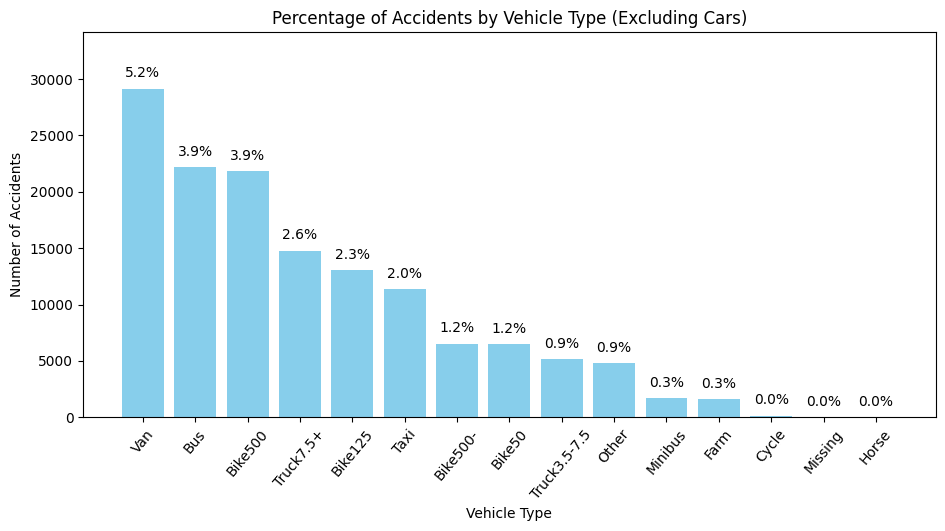

In [27]:
slight_vehicle_types = ["Van", "Bus", "Bike500", "Truck7.5+", "Bike125", "Taxi", "Bike500-", 
                 "Bike50", "Truck3.5-7.5", "Other", "Minibus", "Farm", "Cycle", "Missing", "Horse"]
slight_vehicle_percentages = [np.round(29139 / 563801 * 100, 1),
               np.round(22180 / 563801 * 100, 1),
               np.round(21861 / 563801 * 100, 1),
               np.round(14770 / 563801 * 100, 1),
               np.round(13049 / 563801 * 100, 1),
               np.round(11368 / 563801 * 100, 1),
               np.round(6537 / 563801 * 100, 1),
               np.round(6494 / 563801 * 100, 1),
               np.round(5172 / 563801 * 100, 1),
               np.round(4800 / 563801 * 100, 1),
               np.round(1671 / 563801 * 100, 1),
               np.round(1644 / 563801 * 100, 1),
               np.round(152 / 563801 * 100, 1),
               np.round(6 / 563801 * 100, 1),
               np.round(4 / 563801 * 100, 1)]
                       
accident_counts = [29139, 22180, 21861, 14770, 13049, 11368, 6537, 6494, 5172, 4800, 1671, 1644, 152, 6, 4]

car_percentage = np.round(424954 / 563801 * 100, 1)
print(f"Car accidents account for {car_percentage}% of the total, making it highest contributor.")


plt.figure(figsize=(11, 5))
plt.bar(slight_vehicle_types, accident_counts, color='skyblue')


plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.title("Percentage of Accidents by Vehicle Type (Excluding Cars)")
bars = plt.bar(slight_vehicle_types, accident_counts, color='skyblue')

for bar, percent in zip(bars, slight_vehicle_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1000, 
             f"{percent:.1f}%", ha='center', fontsize=10, color='black')

y_accidents = max(accident_counts)
plt.ylim(0, y_accidents + 5000)

plt.xticks(rotation=50)
plt.show()


<div style="width: 100%; height: 20px; background-color: green;"></div>

<h1>Date</h1>
<p style="font-size: 17px; font-weight: bold;">3. What month has most accident?</p>

In [28]:
UK_month.value_counts().sort_values(ascending=False)

Accident Date
11    60424
10    59580
7     57445
6     56481
9     56455
5     56352
3     54086
8     53913
1     52872
12    51836
4     51744
2     49491
Name: count, dtype: int64

In [29]:
print(f"The month November has the most accident with 60424 accidents and having a percentage of {np.round(60424/660679*100,1)}%.")

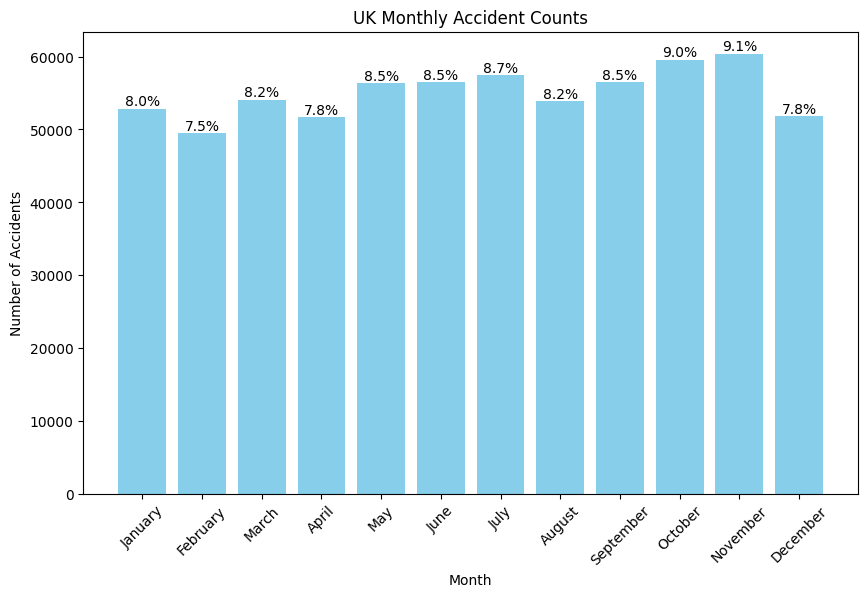

In [30]:
month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
month_accident_counts = [52872, 49491, 54086, 51744, 56352, 56481, 
                         57445, 53913, 56455, 59580, 60424, 51836]


month_total_accidents = sum(month_accident_counts)
month_percentages = [(count / month_total_accidents) * 100 for count in month_accident_counts]

plt.figure(figsize=(10, 6))
month_bars = plt.bar(month_names, month_accident_counts, color='skyblue')


for month_bar, month_percentage in zip(month_bars, month_percentages):
    plt.text(month_bar.get_x() + month_bar.get_width()/2, month_bar.get_height(), 
             f'{month_percentage:.1f}%', ha='center', va='bottom', fontsize=10)


plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.title("UK Monthly Accident Counts")
plt.xticks(rotation=45)  # Rotate labels for better readability

# Show graph
plt.show()

<div style="width: 100%; height: 20px; background-color: green;"></div>

<p style="font-size: 17px; font-weight: bold;">4. How many percent each year?</p>

In [31]:
all_year = 182115 +  170591 + 163554 +  144419

In [32]:
year_2019 =  182115
year_2020 = 170591
year_2021 =  163554
year_2022 = 144419

In [33]:
output_year= (
    f"### Yearly Accidents (as a percentage of the total):\n\n"
    f"- **2019:**    {np.round((year_2019 / all_year) * 100, 1)}%\n"
    f"- **2020:**    {np.round((year_2020 / all_year) * 100, 1)}%\n"
    f"- **2021:**    {np.round((year_2021 / all_year) * 100, 1)}%\n"
    f"- **2022:**    {np.round((year_2022 / all_year) * 100, 1)}%\n\n"
    f"---\n"
    f"### **Conclusion:**\n"
    f"- The year **2019** has the highest percentage contribution among all the years analyzed, indicating it had the most significant share of incidents.\n"
   )


display(Markdown(output_year))

### Yearly Accidents (as a percentage of the total):

- **2019:**    27.6%
- **2020:**    25.8%
- **2021:**    24.8%
- **2022:**    21.9%

---
### **Conclusion:**
- The year **2019** has the highest percentage contribution among all the years analyzed, indicating it had the most significant share of incidents.


In [34]:
graph_year = UK_year.value_counts()
graph_year

Accident Date
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

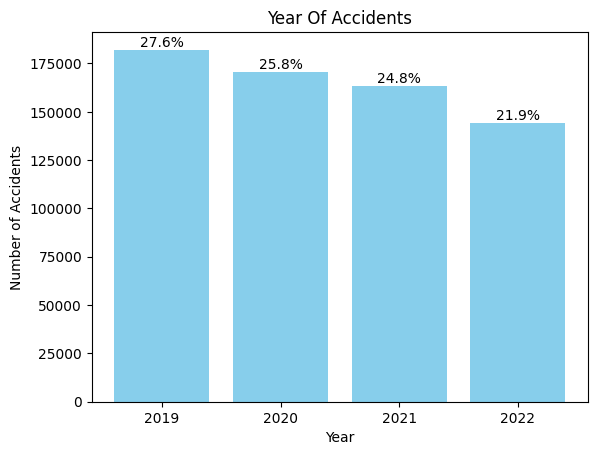

In [35]:
year_accidents = {
    '2019': 182115,
    '2020': 170591,
    '2021': 163554,
    '2022': 144419
}

year_labels = list(year_accidents.keys())
year_values = list(year_accidents.values())


year_total = sum(year_values)
year_percentages = [(val / year_total) * 100 for val in year_values]


fig, ax = plt.subplots()
year_bars = ax.bar(year_labels, year_values, color='skyblue')


for bar, percent in zip(year_bars, year_percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percent:.1f}%', 
            ha='center', va='bottom', fontsize=10)


plt.title("Year Of Accidents")
plt.ylabel("Number of Accidents")
plt.xlabel("Year")

plt.show()

<div style="width: 100%; height: 20px; background-color: green;"></div>

<p style="font-size: 17px; font-weight: bold;">5. How much percent difference is there between 2019 and 2020?</p>

In [36]:
UK_year.value_counts().sort_values(ascending=False)

Accident Date
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

In [37]:
print(f"The year 2020 has decreased {np.round(((182115/170591)-1)*100,1)}% accidents than the previous year 2019")

In [38]:
df_2019_2020 = UK_accident[UK_accident["Year"].isin([2019,2020])]

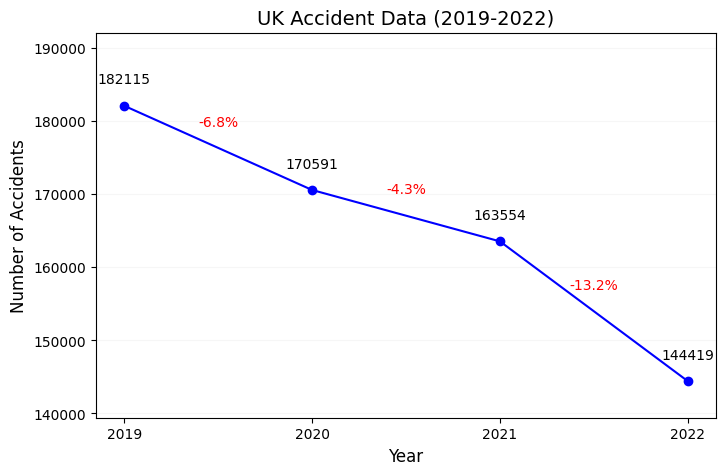

In [39]:
UK_years = np.array([2019, 2020, 2021, 2022])
UK_year_accidents = np.array([182115, 170591, 163554, 144419])


UK_year_percentage_decrease = np.round(((UK_year_accidents[:-1] / UK_year_accidents[1:]) - 1) * 100, 1)


plt.figure(figsize=(8, 5))
plt.plot(UK_years, UK_year_accidents, marker='o', linestyle='-', color='b', label="Accidents")


plt.ylim(min(UK_year_accidents) - 5000, max(UK_year_accidents) + 10000)


plt.xticks(UK_years, fontsize=10)


for i, txt in enumerate(UK_year_accidents):
    plt.text(UK_years[i], UK_year_accidents[i] + 3000, str(txt), ha='center', fontsize=10)


for i in range(len(UK_year_percentage_decrease)):
    mid_x = (UK_years[i] + UK_years[i+1]) / 2
    mid_y = (UK_year_accidents[i] + UK_year_accidents[i+1]) / 2 + 3000  
    plt.text(mid_x, mid_y, f"-{UK_year_percentage_decrease[i]}%", color="red", fontsize=10, ha='center')

plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("UK Accident Data (2019-2022)", fontsize=14)
plt.grid(axis='y', linestyle='-', alpha=0.1)
plt.show()

<div style="width: 100%; height: 20px; background-color: green;"></div>

<p style="font-size: 17px; font-weight: bold;">6. How much percent difference is there between 2020 and 2021?</p>

In [40]:
print(f"The year 2021 has decreased {np.round(((170591/163554)-1)*100,1)}% accidents than the previous year 2020")

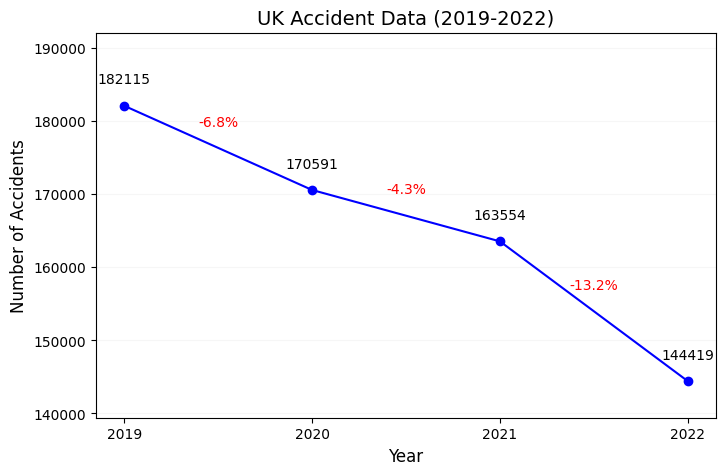

In [41]:
UK_years = np.array([2019, 2020, 2021, 2022])
UK_year_accidents = np.array([182115, 170591, 163554, 144419])


UK_year_percentage_decrease = np.round(((UK_year_accidents[:-1] / UK_year_accidents[1:]) - 1) * 100, 1)


plt.figure(figsize=(8, 5))
plt.plot(UK_years, UK_year_accidents, marker='o', linestyle='-', color='b', label="Accidents")


plt.ylim(min(UK_year_accidents) - 5000, max(UK_year_accidents) + 10000)


plt.xticks(UK_years, fontsize=10)


for i, txt in enumerate(UK_year_accidents):
    plt.text(UK_years[i], UK_year_accidents[i] + 3000, str(txt), ha='center', fontsize=10)


for i in range(len(UK_year_percentage_decrease)):
    mid_x = (UK_years[i] + UK_years[i+1]) / 2
    mid_y = (UK_year_accidents[i] + UK_year_accidents[i+1]) / 2 + 3000  
    plt.text(mid_x, mid_y, f"-{UK_year_percentage_decrease[i]}%", color="red", fontsize=10, ha='center')

plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("UK Accident Data (2019-2022)", fontsize=14)
plt.grid(axis='y', linestyle='-', alpha=0.1)
plt.show()

<div style="width: 100%; height: 20px; background-color: green;"></div>

<p style="font-size: 17px; font-weight: bold;">7. How much percent difference is there between 2021 and 2022?</p>

In [42]:
print(f"The year 2022 has decreased {np.round(((163554/144419)-1)*100,1)}% accidents than the previous year 2021")

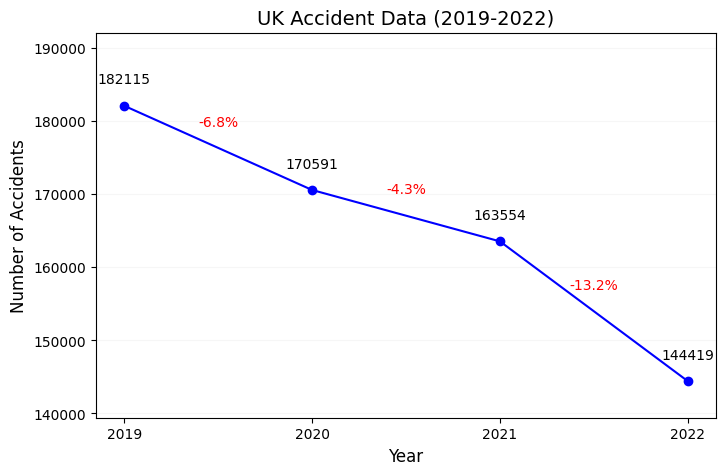

In [43]:
UK_years = np.array([2019, 2020, 2021, 2022])
UK_year_accidents = np.array([182115, 170591, 163554, 144419])


UK_year_percentage_decrease = np.round(((UK_year_accidents[:-1] / UK_year_accidents[1:]) - 1) * 100, 1)


plt.figure(figsize=(8, 5))
plt.plot(UK_years, UK_year_accidents, marker='o', linestyle='-', color='b', label="Accidents")


plt.ylim(min(UK_year_accidents) - 5000, max(UK_year_accidents) + 10000)


plt.xticks(UK_years, fontsize=10)


for i, txt in enumerate(UK_year_accidents):
    plt.text(UK_years[i], UK_year_accidents[i] + 3000, str(txt), ha='center', fontsize=10)


for i in range(len(UK_year_percentage_decrease)):
    mid_x = (UK_years[i] + UK_years[i+1]) / 2
    mid_y = (UK_year_accidents[i] + UK_year_accidents[i+1]) / 2 + 3000  
    plt.text(mid_x, mid_y, f"-{UK_year_percentage_decrease[i]}%", color="red", fontsize=10, ha='center')

plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("UK Accident Data (2019-2022)", fontsize=14)
plt.grid(axis='y', linestyle='-', alpha=0.1)
plt.show()

<div style="width: 100%; height: 20px; background-color: green;"></div>

<h1>Road Conditions</h1>

<p style="font-size: 17px; font-weight: bold;">8. What road conditions most accidents occur?</p>

In [44]:
road = UK_accident["Road_Surface_Conditions"]

In [45]:
dry_road = (road =="Dry").sum()
wet_road = (road =="Wet or damp").sum()
frost_road = (road =="Frost or ice").sum()
snow_road = (road =="Snow").sum()
flood_road = (road =="Flood over 3cm. deep").sum()

In [46]:
all_road = dry_road + wet_road+frost_road+snow_road+flood_road

In [47]:
output_road= (
    f"### Road Conditions where accidents happen (as a percentage of the total):\n\n"
    f"- **Dry:**    {np.round((dry_road / all_road) * 100, 1)}%\n"
    f"- **Wet:**    {np.round((wet_road / all_road) * 100, 1)}%\n"
    f"- **Frost:**    {np.round((frost_road / all_road) * 100, 1)}%\n"
    f"- **Snow:**    {np.round((snow_road / all_road) * 100, 1)}%\n\n"
    f"- **Flooded:**    {np.round((flood_road / all_road) * 100, 1)}%\n\n"
    f"---\n"
    f"### **Conclusion:**\n"
    f"- The **Dry** road condition has the highest percentage contribution among all the road conditions analyzed with {np.round((dry_road / all_road) * 100, 1)}% of accidents happened, indicating most accidents occcur in dry road conditions.\n"
   )


display(Markdown(output_road))

### Road Conditions where accidents happen (as a percentage of the total):

- **Dry:**    67.9%
- **Wet:**    28.3%
- **Frost:**    2.8%
- **Snow:**    0.9%

- **Flooded:**    0.2%

---
### **Conclusion:**
- The **Dry** road condition has the highest percentage contribution among all the road conditions analyzed with 67.9% of accidents happened, indicating most accidents occcur in dry road conditions.


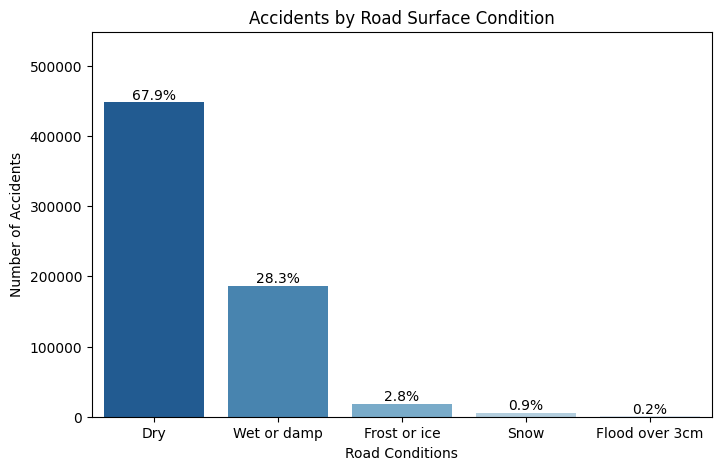

In [48]:
all_road = dry_road + wet_road + frost_road + snow_road + flood_road
road_conditions = ["Dry", "Wet or damp", "Frost or ice", "Snow", "Flood over 3cm"]
accident_counts = [dry_road, wet_road, frost_road, snow_road, flood_road]
percentages = [(count / all_road) * 100 for count in accident_counts]


plt.figure(figsize=(8, 5))
sns.barplot(x=road_conditions, y=accident_counts, palette="Blues_r")


plt.xlabel("Road Conditions")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Road Surface Condition")
plt.ylim(0, max(accident_counts) + 100000) 


for x, percent in enumerate(percentages):
    plt.text(x, accident_counts[x] + 5, f"{percent:.1f}%", ha="center", va="bottom", fontsize=10)

plt.show()

<div style="width: 100%; height: 20px; background-color: green;"></div>

<p style="font-size: 17px; font-weight: bold;">9. What weather conditions does accidents mostly occur in dry road conditions?</p>

In [49]:
UK_accident["Weather_Conditions"].value_counts()

Weather_Conditions
Fine no high winds           520885
Raining no high winds         79696
Other                         17150
unknown weather condition     14128
Raining + high winds           9615
Fine + high winds              8554
Snowing no high winds          6238
Fog or mist                    3528
Snowing + high winds            885
Name: count, dtype: int64

In [50]:
dry_weather = (UK_accident["Weather_Conditions"] == "Fine no high winds").sum() & dry_road

In [51]:
dry_weather 

446497

In [52]:
percentage_dry = np.round(dry_weather / all_road * 100, 2)
print(f"{percentage_dry}% of accidents occur during fine weather and dry road conditions. "
      "This suggests that despite seemingly safe environmental factors, such as clear skies and optimal road surfaces, accidents still occur.")

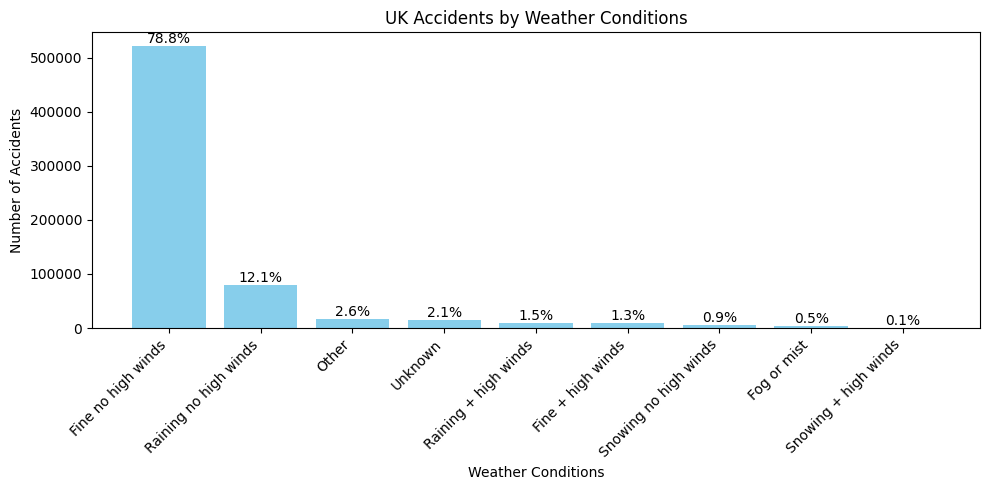

In [53]:
import matplotlib.pyplot as plt
import numpy as np


UK_weather_conditions = [
    "Fine no high winds", "Raining no high winds", "Other", "Unknown",
    "Raining + high winds", "Fine + high winds", "Snowing no high winds",
    "Fog or mist", "Snowing + high winds"
]
UK_weather_counts = [520885, 79696, 17150, 14128, 9615, 8554, 6238, 3528, 885]
UK_weather_total = sum(UK_weather_counts)
UK_weather_percentages = [count / UK_weather_total * 100 for count in UK_weather_counts]


fig, ax = plt.subplots(figsize=(10, 5))
UK_weather_bars = ax.bar(UK_weather_conditions, UK_weather_counts, color='skyblue')


for bar, UK_weather_percent in zip(UK_weather_bars, UK_weather_percentages):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{UK_weather_percent:.1f}%', 
            ha='center', va='bottom', fontsize=10)


ax.set_ylabel("Number of Accidents")
ax.set_xlabel("Weather Conditions")
ax.set_title("UK Accidents by Weather Conditions")
ax.set_xticks(np.arange(len(UK_weather_conditions)))
ax.set_xticklabels(UK_weather_conditions, rotation=45, ha="right")
plt.tight_layout()

# Show plot
plt.show()


<div style="width: 100%; height: 20px; background-color: green;"></div>

<p style="font-size: 17px; font-weight: bold;">10. How much percentage of casualties per weather conditions?</p>

In [54]:
UK_accident["Number_of_Casualties"].sum()

896568

In [55]:
fine_weather=(UK_accident["Weather_Conditions"] == "Fine no high winds").sum()
rain_no_wind_weather=(UK_accident["Weather_Conditions"] == "Raining no high winds").sum()
other_weather=(UK_accident["Weather_Conditions"] == "Other").sum()
unknown_weather=(UK_accident["Weather_Conditions"] == "unknown weather condition").sum()
rain_high_wind_weather=(UK_accident["Weather_Conditions"] == "Raining + high winds").sum()
fine_high_wind_weather=(UK_accident["Weather_Conditions"] == "Fine + high winds").sum()
snow_no_wind_weather=(UK_accident["Weather_Conditions"] == "Snowing no high winds").sum()
fog_weather=(UK_accident["Weather_Conditions"] == "Fog or mist").sum()
snow_high_wind_weather=(UK_accident["Weather_Conditions"] == "Snowing + high winds").sum()

In [56]:
casualties_fine_weather = UK_accident[UK_accident["Weather_Conditions"] == "Fine no high winds"]["Number_of_Casualties"].sum()
casualties_rain_no_wind_weather = UK_accident[UK_accident["Weather_Conditions"] == "Raining no high winds"]["Number_of_Casualties"].sum()
casualties_other_weather = UK_accident[UK_accident["Weather_Conditions"] == "Other"]["Number_of_Casualties"].sum()
casualties_unknown_weather = UK_accident[UK_accident["Weather_Conditions"] == "unknown weather condition"]["Number_of_Casualties"].sum()
casualties_rain_high_wind_weather = UK_accident[UK_accident["Weather_Conditions"] == "Raining + high winds"]["Number_of_Casualties"].sum()
casualties_fine_high_wind_weather = UK_accident[UK_accident["Weather_Conditions"] == "Fine + high winds"]["Number_of_Casualties"].sum()
casualties_snow_no_wind_weather = UK_accident[UK_accident["Weather_Conditions"] == "Snowing no high winds"]["Number_of_Casualties"].sum()
casualties_fog_weather = UK_accident[UK_accident["Weather_Conditions"] == "Fog or mist"]["Number_of_Casualties"].sum()
casualties_snow_high_wind_weather = UK_accident[UK_accident["Weather_Conditions"] == "Snowing + high winds"]["Number_of_Casualties"].sum()

In [57]:
all_casualties = (
    casualties_fine_weather +
    casualties_rain_no_wind_weather +
    casualties_other_weather +
    casualties_unknown_weather +
    casualties_rain_high_wind_weather +
    casualties_fine_high_wind_weather +
    casualties_snow_no_wind_weather +
    casualties_fog_weather +
    casualties_snow_high_wind_weather
)


In [58]:
output_casualties_weather = (
    f"### Number of casualties per weather conditions (as a percentage of the total):\n\n"
    f"- Fine no high winds: {np.round(casualties_fine_weather / all_casualties * 100, 1)}%\n"
    f"- Raining no high winds: {np.round(casualties_rain_no_wind_weather / all_casualties * 100, 1)}%\n"
    f"- Other: {np.round(casualties_other_weather / all_casualties * 100, 1)}%\n"
    f"- Unknown weather condition: {np.round(casualties_unknown_weather / all_casualties * 100, 1)}%\n"
    f"- Raining + high winds: {np.round(casualties_rain_high_wind_weather / all_casualties * 100, 1)}%\n"
    f"- Fine + high winds: {np.round(casualties_fine_high_wind_weather / all_casualties * 100, 1)}%\n"
    f"- Snowing no high winds: {np.round(casualties_snow_no_wind_weather / all_casualties * 100, 1)}%\n"
    f"- Fog or mist: {np.round(casualties_fog_weather / all_casualties * 100, 1)}%\n"
    f"- Snowing + high winds: {np.round(casualties_snow_high_wind_weather / all_casualties * 100, 1)}%\n"
    f"---\n"
    f"### **Conclusion:**\n"
    f"- The **Fine no high winds** weather condition has the highest percentage contribution among all the weather conditions analyzed with **{np.round((casualties_fine_weather / all_casualties) * 100, 1)}%** of casualties recorded, indicating most deadly accidents occur in fine weather conditions.\n"
)


display(Markdown(output_casualties_weather))

### Number of casualties per weather conditions (as a percentage of the total):

- Fine no high winds: 78.5%
- Raining no high winds: 12.5%
- Other: 2.6%
- Unknown weather condition: 1.9%
- Raining + high winds: 1.5%
- Fine + high winds: 1.3%
- Snowing no high winds: 0.9%
- Fog or mist: 0.6%
- Snowing + high winds: 0.1%
---
### **Conclusion:**
- The **Fine no high winds** weather condition has the highest percentage contribution among all the weather conditions analyzed with **78.5%** of casualties recorded, indicating most deadly accidents occur in fine weather conditions.


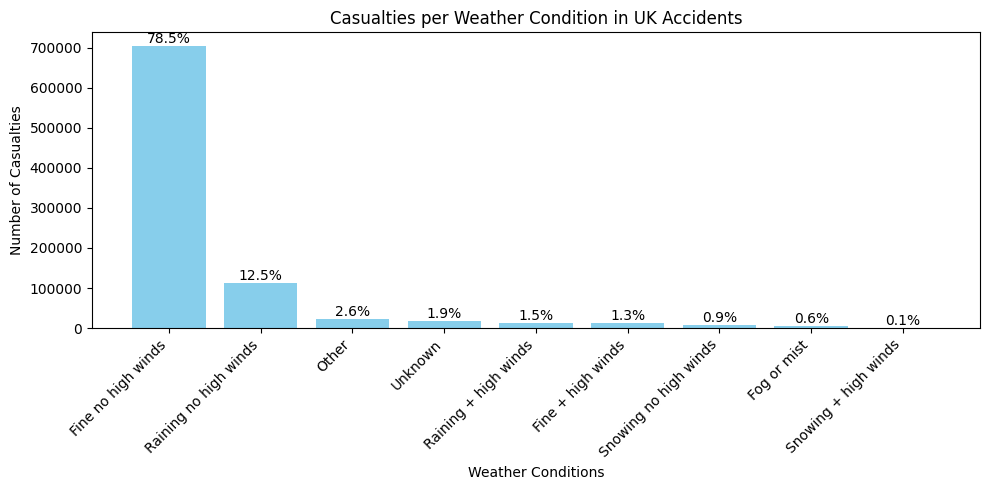

In [59]:
import matplotlib.pyplot as plt
import numpy as np


UK_weather_conditions = [
    "Fine no high winds", "Raining no high winds", "Other", "Unknown",
    "Raining + high winds", "Fine + high winds", "Snowing no high winds",
    "Fog or mist", "Snowing + high winds"
]
UK_weather_casualties = [
    casualties_fine_weather, casualties_rain_no_wind_weather, casualties_other_weather, casualties_unknown_weather,
    casualties_rain_high_wind_weather, casualties_fine_high_wind_weather, casualties_snow_no_wind_weather,
    casualties_fog_weather, casualties_snow_high_wind_weather
]
UK_weather_total_casualties = sum(UK_weather_casualties)
UK_weather_percentages = [casualties / UK_weather_total_casualties * 100 for casualties in UK_weather_casualties]


fig, ax = plt.subplots(figsize=(10, 5))
UK_weather_bars = ax.bar(UK_weather_conditions, UK_weather_casualties, color='skyblue')


for bar, UK_weather_percent in zip(UK_weather_bars, UK_weather_percentages):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{UK_weather_percent:.1f}%', 
            ha='center', va='bottom', fontsize=10)


ax.set_ylabel("Number of Casualties")
ax.set_xlabel("Weather Conditions")
ax.set_title("Casualties per Weather Condition in UK Accidents")
ax.set_xticks(np.arange(len(UK_weather_conditions)))
ax.set_xticklabels(UK_weather_conditions, rotation=45, ha="right")
plt.tight_layout()

# Show plot
plt.show()


<div style="width: 100%; height: 20px; background-color: green;"></div>

<p style="font-size: 17px; font-weight: bold;">11. How much percentage of casualties in dry road conditions during fine weather conditions?</p>

In [60]:
casualties_fine_dry  = (dry_road) & casualties_fine_weather

In [61]:
casualties_fine_dry_percent = np.round(casualties_fine_dry / all_casualties * 100,2)

In [62]:
print(f"The number of casualties in fine weather and dry road conditions are {casualties_fine_dry} which is {casualties_fine_dry_percent}% of total casualties of UK accidents during 2019-2022.")

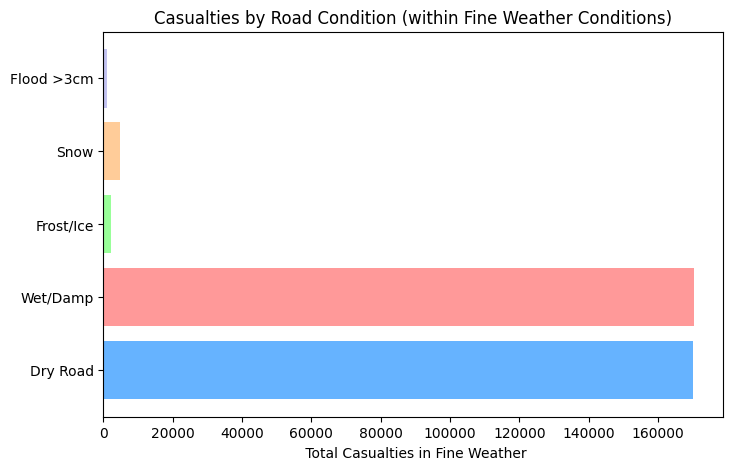

In [63]:
casualties_fine_total = casualties_fine_weather.sum()
casualties_data = {
    'Dry Road': ((dry_road) & casualties_fine_weather).sum(),
    'Wet/Damp': ((wet_road) & casualties_fine_weather).sum(),
    'Frost/Ice': ((frost_road) & casualties_fine_weather).sum(),
    'Snow': ((snow_road) & casualties_fine_weather).sum(),
    'Flood >3cm': ((flood_road) & casualties_fine_weather).sum()
}


percentages = {k: np.round(v / casualties_fine_total * 100, 2) for k, v in casualties_data.items()}


plt.figure(figsize=(8,5))
plt.barh(list(casualties_data.keys()), list(casualties_data.values()), color=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.xlabel(" Total Casualties in Fine Weather")
plt.title("Casualties by Road Condition (within Fine Weather Conditions)")
plt.show()


<div style="width: 100%; height: 20px; background-color: green;"></div>

<h1>Vehicles</h1>

<p style="font-size: 17px; font-weight: bold;">12. Percentage of accidents per Vehicle</p>

In [64]:
output_vehicle_types = (
    f"### Vehicle Type Accidents (as a percentage of the total):\n\n"
    f"- **{np.round((vehicle_car / 660679) * 100, 1)}%** Car\n"
    f"- **{np.round((vehicle_van / 660679) * 100, 1)}%** Van / Goods 3.5 tonnes mgw or under\n"
    f"- **{np.round((vehicle_bus / 660679) * 100, 1)}%** Bus or coach (17 or more pass seats)\n"
    f"- **{np.round((vehicle_motor_500 / 660679) * 100, 1)}%** Motorcycle over 500cc\n"
    f"- **{np.round((vehicle_goods_7_5 / 660679) * 100, 1)}%** Goods 7.5 tonnes mgw and over\n"
    f"- **{np.round((vehicle_motor_125_down / 660679) * 100, 1)}%** Motorcycle 125cc and under\n"
    f"- **{np.round((vehicle_taxi / 660679) * 100, 1)}%** Taxi/Private hire car\n"
    f"- **{np.round((vehicle_motor_125_up / 660679) * 100, 1)}%** Motorcycle over 125cc and up to 500cc\n"
    f"- **{np.round((vehicle_motor_50 / 660679) * 100, 1)}%** Motorcycle 50cc and under\n"
    f"- **{np.round((vehicle_goods_3_5 / 660679) * 100, 1)}%** Goods over 3.5t. and under 7.5t\n"
    f"- **{np.round((vehicle_other / 660679) * 100, 1)}%** Other vehicle\n"
    f"- **{np.round((vehicle_minibus / 660679) * 100, 1)}%** Minibus (8 - 16 passenger seats)\n"
    f"- **{np.round((vehicle_agri / 660679) * 100, 1)}%** Agricultural vehicle\n"
    f"- **{np.round((vehicle_pedal / 660679) * 100, 1)}%** Pedal cycle\n"
    f"- **{np.round((vehicle_missing / 660679) * 100, 1)}%** Data missing or out of range\n"
    f"- **{np.round((vehicle_horse / 660679) * 100, 1)}%** Ridden horse\n\n"
    f"---\n"
    f"### **Conclusion:**\n"
    f"- The most common vehicle type involved in accidents is Car, with the highest percentage contribution: **{np.round((vehicle_car / 660679) * 100, 1)}%**.\n"
    f"- Other notable contributors include Van / Goods 3.5 tonnes mgw or under (**{np.round((vehicle_van / 660679) * 100, 1)}%**) and Motorcycles (**{np.round(((vehicle_motor_500 + vehicle_motor_125_down + vehicle_motor_125_up + vehicle_motor_50) / 660679) * 100, 1)}%** combined).\n"
)

display(Markdown(output_vehicle_types))

### Vehicle Type Accidents (as a percentage of the total):

- **75.4%** Car
- **5.2%** Van / Goods 3.5 tonnes mgw or under
- **3.9%** Bus or coach (17 or more pass seats)
- **3.9%** Motorcycle over 500cc
- **2.6%** Goods 7.5 tonnes mgw and over
- **2.3%** Motorcycle 125cc and under
- **2.0%** Taxi/Private hire car
- **1.2%** Motorcycle over 125cc and up to 500cc
- **1.2%** Motorcycle 50cc and under
- **0.9%** Goods over 3.5t. and under 7.5t
- **0.9%** Other vehicle
- **0.3%** Minibus (8 - 16 passenger seats)
- **0.3%** Agricultural vehicle
- **0.0%** Pedal cycle
- **0.0%** Data missing or out of range
- **0.0%** Ridden horse

---
### **Conclusion:**
- The most common vehicle type involved in accidents is Car, with the highest percentage contribution: **75.4%**.
- Other notable contributors include Van / Goods 3.5 tonnes mgw or under (**5.2%**) and Motorcycles (**8.5%** combined).


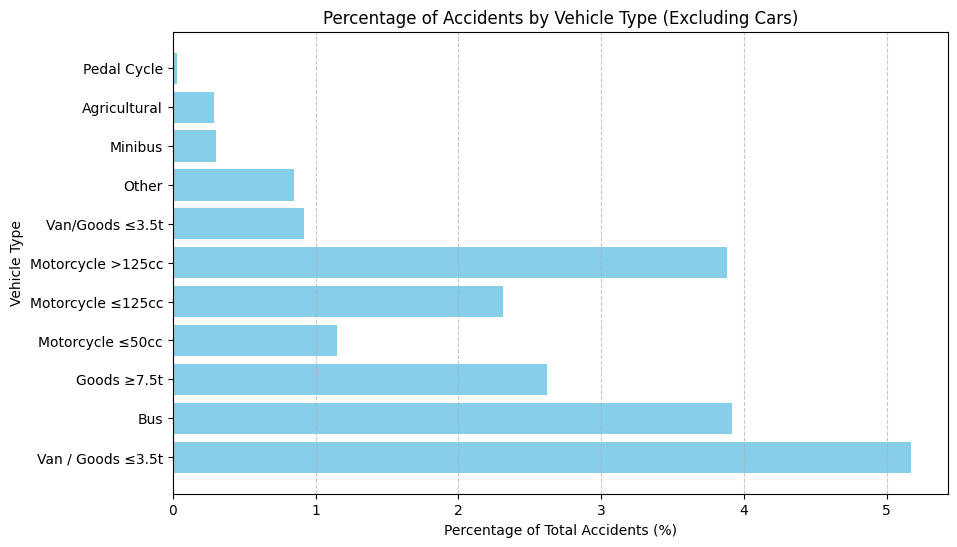

In [65]:
total_accidents = 660679
vehicle_data = {
    'Van / Goods ≤3.5t': vehicle_van,
    'Bus': vehicle_bus,
    'Goods ≥7.5t': vehicle_goods_7_5,
    'Motorcycle ≤50cc': vehicle_motor_50,
    'Motorcycle ≤125cc': vehicle_motor_125_down,
    'Motorcycle >125cc': vehicle_motor_125_down,
    'Motorcycle >125cc': vehicle_motor_500,
    'Van/Goods ≤3.5t': vehicle_goods_3_5,
    'Other': vehicle_other,
    'Minibus': vehicle_minibus,
    'Agricultural': vehicle_agri,
    'Pedal Cycle': vehicle_pedal
}

# Calculate percentages
vehicle_percentages = {k: np.round((v / 660679) * 100, 2) for k, v in vehicle_data.items()}

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(list(vehicle_percentages.keys()), list(vehicle_percentages.values()), color='skyblue')
plt.xlabel("Percentage of Total Accidents (%)")
plt.ylabel("Vehicle Type")
plt.title("Percentage of Accidents by Vehicle Type (Excluding Cars)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<div style="width: 100%; height: 20px; background-color: green;"></div>

<h1>Rural And Urban</h1>

<p style="font-size: 17px; font-weight: bold;">13. Urban and Rural accident distribution</p>

In [66]:
urban_rural= UK_accident['Urban_or_Rural_Area']

In [67]:
urban = (urban_rural == "Urban").sum()
rural = (urban_rural == "Rural").sum()
urban_rural_sum = urban + rural


In [68]:
print(f"The number of urban accidents are {urban} which is {np.round(urban / urban_rural_sum *100 ,1)}% and the rural accidents are {rural} which is {np.round(rural/urban_rural_sum *100,1)}%.")

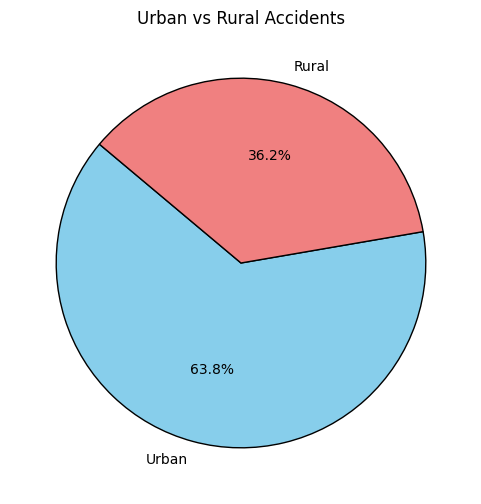

In [69]:
labels = ['Urban', 'Rural']
sizes = [urban, rural]
colors = ['skyblue', 'lightcoral']

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Urban vs Rural Accidents')
plt.show()


<div style="width: 100%; height: 20px; background-color: green;"></div>

<p style="font-size: 17px; font-weight: bold;">14. Urban accidents distribution accidents per vehicle</p>

In [70]:
urban_car = (UK_accident["Vehicle_Type"] == "Car").sum() & urban
urban_van = (UK_accident["Vehicle_Type"] == "Van / Goods 3.5 tonnes mgw or under").sum() & urban
urban_bus = (UK_accident["Vehicle_Type"] == "Bus or coach (17 or more pass seats)").sum() & urban
urban_motor_500 = (UK_accident["Vehicle_Type"] == "Motorcycle over 500cc").sum() & urban
urban_goods_7_5 = (UK_accident["Vehicle_Type"] == "Goods 7.5 tonnes mgw and over").sum() & urban
urban_motor_125_down = (UK_accident["Vehicle_Type"] == "Motorcycle 125cc and under").sum() & urban
urban_taxi = (UK_accident["Vehicle_Type"] == "Taxi/Private hire car").sum() & urban
urban_motor_125_up = (UK_accident["Vehicle_Type"] == "Motorcycle over 125cc and up to 500cc").sum() & urban
urban_motor_50 = (UK_accident["Vehicle_Type"] == "Motorcycle 50cc and under").sum() & urban
urban_goods_3_5 = (UK_accident["Vehicle_Type"] == "Goods over 3.5t. and under 7.5t").sum() & urban
urban_other = (UK_accident["Vehicle_Type"] == "Other vehicle").sum() & urban
urban_minibus = (UK_accident["Vehicle_Type"] == "Minibus (8 - 16 passenger seats)").sum() & urban
urban_agri = (UK_accident["Vehicle_Type"] == "Agricultural vehicle").sum() & urban
urban_pedal = (UK_accident["Vehicle_Type"] == "Pedal cycle").sum() & urban
urban_missing = (UK_accident["Vehicle_Type"] == "Data missing or out of range").sum() & urban
urban_horse = (UK_accident["Vehicle_Type"] == "Ridden horse").sum() & urban

In [71]:
total_urban_vehicles = (
    urban_car + urban_van + urban_bus + urban_motor_500 + urban_goods_7_5 +
    urban_motor_125_down + urban_taxi + urban_motor_125_up + urban_motor_50 +
    urban_goods_3_5 + urban_other + urban_minibus + urban_agri + urban_pedal +
    urban_missing + urban_horse
)

In [72]:
output_vehicle_types_urban = (
    f"### Urban Vehicle Accidents (as a percentage of the total):\n\n"
    f"- **{np.round((urban_car / total_urban_vehicles) * 100, 1)}%** Car\n"
    f"- **{np.round((urban_van / total_urban_vehicles) * 100, 1)}%** Van / Goods 3.5 tonnes mgw or under\n"
    f"- **{np.round((urban_bus / total_urban_vehicles) * 100, 1)}%** Bus or coach (17 or more pass seats)\n"
    f"- **{np.round((urban_motor_500 / total_urban_vehicles) * 100, 1)}%** Motorcycle over 500cc\n"
    f"- **{np.round((urban_goods_7_5 / total_urban_vehicles) * 100, 1)}%** Goods 7.5 tonnes mgw and over\n"
    f"- **{np.round((urban_motor_125_down / total_urban_vehicles) * 100, 1)}%** Motorcycle 125cc and under\n"
    f"- **{np.round((urban_taxi / total_urban_vehicles) * 100, 1)}%** Taxi/Private hire car\n"
    f"- **{np.round((urban_motor_125_up / total_urban_vehicles) * 100, 1)}%** Motorcycle over 125cc and up to 500cc\n"
    f"- **{np.round((urban_motor_50 / total_urban_vehicles) * 100, 1)}%** Motorcycle 50cc and under\n"
    f"- **{np.round((urban_goods_3_5 / total_urban_vehicles) * 100, 1)}%** Goods over 3.5t. and under 7.5t\n"
    f"- **{np.round((urban_other / total_urban_vehicles) * 100, 1)}%** Other vehicle\n"
    f"- **{np.round((urban_minibus / total_urban_vehicles) * 100, 1)}%** Minibus (8 - 16 passenger seats)\n"
    f"- **{np.round((urban_agri / total_urban_vehicles) * 100, 1)}%** Agricultural vehicle\n"
    f"- **{np.round((urban_pedal / total_urban_vehicles) * 100, 1)}%** Pedal cycle\n"
    f"- **{np.round((urban_missing / total_urban_vehicles) * 100, 1)}%** Data missing or out of range\n"
    f"- **{np.round((urban_horse / total_urban_vehicles) * 100, 1)}%** Ridden horse\n\n"
    f"---\n"
    f"### **Urban Conclusion:**\n"
    f"- The most common vehicle type involved in accidents in urban areas is Car, with the highest percentage contribution: ({urban_car}) **{np.round((urban_car / total_urban_vehicles) * 100, 1)}%**.\n"
    f"- Other notable contributors include Van / Goods 3.5 tonnes mgw or under (**{np.round((urban_van / total_urban_vehicles) * 100, 1)}%**) and Motorcycles (**{np.round(((urban_motor_500 + urban_motor_125_down + urban_motor_125_up + urban_motor_50) / total_urban_vehicles) * 100, 1)}%** combined).\n"
)

display(Markdown(output_vehicle_types_urban))

### Urban Vehicle Accidents (as a percentage of the total):

- **79.2%** Car
- **0.3%** Van / Goods 3.5 tonnes mgw or under
- **5.2%** Bus or coach (17 or more pass seats)
- **5.1%** Motorcycle over 500cc
- **3.4%** Goods 7.5 tonnes mgw and over
- **2.2%** Motorcycle 125cc and under
- **1.8%** Taxi/Private hire car
- **0.7%** Motorcycle over 125cc and up to 500cc
- **0.7%** Motorcycle 50cc and under
- **0.4%** Goods over 3.5t. and under 7.5t
- **0.3%** Other vehicle
- **0.4%** Minibus (8 - 16 passenger seats)
- **0.4%** Agricultural vehicle
- **0.0%** Pedal cycle
- **0.0%** Data missing or out of range
- **0.0%** Ridden horse

---
### **Urban Conclusion:**
- The most common vehicle type involved in accidents in urban areas is Car, with the highest percentage contribution: (395528) **79.2%**.
- Other notable contributors include Van / Goods 3.5 tonnes mgw or under (**0.3%**) and Motorcycles (**8.7%** combined).


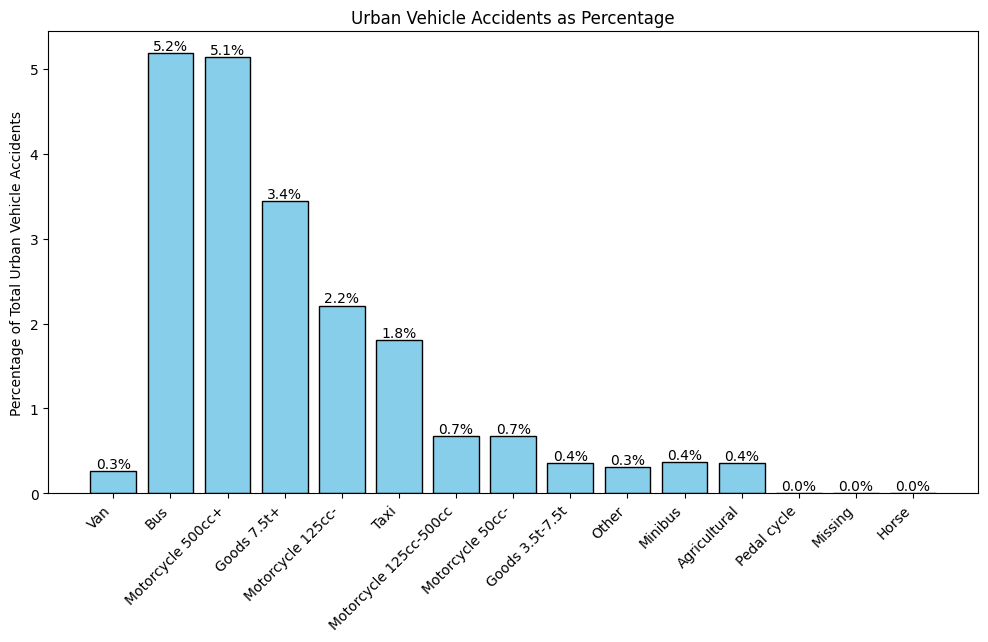

In [73]:
vehicle_labels = [ "Van", "Bus", "Motorcycle 500cc+", "Goods 7.5t+", "Motorcycle 125cc-", "Taxi", "Motorcycle 125cc-500cc", "Motorcycle 50cc-", "Goods 3.5t-7.5t", "Other", "Minibus", "Agricultural", "Pedal cycle", "Missing", "Horse"]
vehicle_counts =  [urban_van, urban_bus, urban_motor_500, urban_goods_7_5, urban_motor_125_down, urban_taxi, urban_motor_125_up, urban_motor_50, urban_goods_3_5, urban_other, urban_minibus, urban_agri, urban_pedal, urban_missing, urban_horse]
percentages = [(x / total_urban_vehicles) * 100 for x in vehicle_counts]

plt.figure(figsize=(12,6))
bars = plt.bar(vehicle_labels, percentages, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Total Urban Vehicle Accidents')
plt.title('Urban Vehicle Accidents as Percentage')


for bar, percent in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{percent:.1f}%', ha='center', va='bottom')

plt.show()


<p style="font-size: 17px; font-weight: bold;">15. Rural accidents distribution accidents per vehicle</p>

In [74]:
rural_car = (UK_accident["Vehicle_Type"] == "Car").sum() & rural
rural_van = (UK_accident["Vehicle_Type"] == "Van / Goods 3.5 tonnes mgw or under").sum() & rural
rural_bus = (UK_accident["Vehicle_Type"] == "Bus or coach (17 or more pass seats)").sum() & rural
rural_motor_500 = (UK_accident["Vehicle_Type"] == "Motorcycle over 500cc").sum() & rural
rural_goods_7_5 = (UK_accident["Vehicle_Type"] == "Goods 7.5 tonnes mgw and over").sum() & rural
rural_motor_125_down = (UK_accident["Vehicle_Type"] == "Motorcycle 125cc and under").sum() & rural
rural_taxi = (UK_accident["Vehicle_Type"] == "Taxi/Private hire car").sum() & rural
rural_motor_125_up = (UK_accident["Vehicle_Type"] == "Motorcycle over 125cc and up to 500cc").sum() & rural
rural_motor_50 = (UK_accident["Vehicle_Type"] == "Motorcycle 50cc and under").sum() & rural
rural_goods_3_5 = (UK_accident["Vehicle_Type"] == "Goods over 3.5t. and under 7.5t").sum() & rural
rural_other = (UK_accident["Vehicle_Type"] == "Other vehicle").sum() & rural
rural_minibus = (UK_accident["Vehicle_Type"] == "Minibus (8 - 16 passenger seats)").sum() & rural
rural_agri = (UK_accident["Vehicle_Type"] == "Agricultural vehicle").sum() & rural
rural_pedal = (UK_accident["Vehicle_Type"] == "Pedal cycle").sum() & rural
rural_missing = (UK_accident["Vehicle_Type"] == "Data missing or out of range").sum() & rural
rural_horse = (UK_accident["Vehicle_Type"] == "Ridden horse").sum() & rural

In [75]:
total_rural_vehicles = (
    rural_car + rural_van + rural_bus + rural_motor_500 + rural_goods_7_5 +
    rural_motor_125_down + rural_taxi + rural_motor_125_up + rural_motor_50 +
    rural_goods_3_5 + rural_other + rural_minibus + rural_agri + rural_pedal +
    rural_missing + rural_horse
)
total_urban_vehicles+ total_rural_vehicles

807456

In [76]:
output_vehicle_types_rural = (
    f"### Rural Vehicle Type Accidents (as a percentage of the total):\n\n"
    f"- **{np.round((rural_car / total_rural_vehicles) * 100, 1)}%** Car\n"
    f"- **{np.round((rural_van / total_rural_vehicles) * 100, 1)}%** Van / Goods 3.5 tonnes mgw or under\n"
    f"- **{np.round((rural_bus / total_rural_vehicles) * 100, 1)}%** Bus or coach (17 or more pass seats)\n"
    f"- **{np.round((rural_motor_500 / total_rural_vehicles) * 100, 1)}%** Motorcycle over 500cc\n"
    f"- **{np.round((rural_goods_7_5 / total_rural_vehicles) * 100, 1)}%** Goods 7.5 tonnes mgw and over\n"
    f"- **{np.round((rural_motor_125_down / total_rural_vehicles) * 100, 1)}%** Motorcycle 125cc and under\n"
    f"- **{np.round((rural_taxi / total_rural_vehicles) * 100, 1)}%** Taxi/Private hire car\n"
    f"- **{np.round((rural_motor_125_up / total_rural_vehicles) * 100, 1)}%** Motorcycle over 125cc and up to 500cc\n"
    f"- **{np.round((rural_motor_50 / total_rural_vehicles) * 100, 1)}%** Motorcycle 50cc and under\n"
    f"- **{np.round((rural_goods_3_5 / total_rural_vehicles) * 100, 1)}%** Goods over 3.5t. and under 7.5t\n"
    f"- **{np.round((rural_other / total_rural_vehicles) * 100, 1)}%** Other vehicle\n"
    f"- **{np.round((rural_minibus / total_rural_vehicles) * 100, 1)}%** Minibus (8 - 16 passenger seats)\n"
    f"- **{np.round((rural_agri / total_rural_vehicles) * 100, 1)}%** Agricultural vehicle\n"
    f"- **{np.round((rural_pedal / total_rural_vehicles) * 100, 1)}%** Pedal cycle\n"
    f"- **{np.round((rural_missing / total_rural_vehicles) * 100, 1)}%** Data missing or out of range\n"
    f"- **{np.round((rural_horse / total_rural_vehicles) * 100, 1)}%** Ridden horse\n\n"
    f"---\n"
    f"### **Rural Conclusion:**\n"
    f"- The most common vehicle type involved in accidents in rural areas is Car, with the highest percentage contribution: **{np.round((rural_car / total_rural_vehicles) * 100, 1)}%**.\n"
    f"- Other notable contributors include Van / Goods 3.5 tonnes mgw or under (**{np.round((rural_van / total_rural_vehicles) * 100, 1)}%**) and Motorcycles (**{np.round(((rural_motor_500 + rural_motor_125_down + rural_motor_125_up + rural_motor_50) / total_rural_vehicles) * 100, 1)}%** combined).\n"
)

display(Markdown(output_vehicle_types_rural))

### Rural Vehicle Type Accidents (as a percentage of the total):

- **74.5%** Car
- **11.0%** Van / Goods 3.5 tonnes mgw or under
- **3.1%** Bus or coach (17 or more pass seats)
- **3.0%** Motorcycle over 500cc
- **0.1%** Goods 7.5 tonnes mgw and over
- **2.8%** Motorcycle 125cc and under
- **2.8%** Taxi/Private hire car
- **0.5%** Motorcycle over 125cc and up to 500cc
- **0.5%** Motorcycle 50cc and under
- **0.5%** Goods over 3.5t. and under 7.5t
- **0.3%** Other vehicle
- **0.5%** Minibus (8 - 16 passenger seats)
- **0.5%** Agricultural vehicle
- **0.0%** Pedal cycle
- **0.0%** Data missing or out of range
- **0.0%** Ridden horse

---
### **Rural Conclusion:**
- The most common vehicle type involved in accidents in rural areas is Car, with the highest percentage contribution: **74.5%**.
- Other notable contributors include Van / Goods 3.5 tonnes mgw or under (**11.0%**) and Motorcycles (**6.7%** combined).


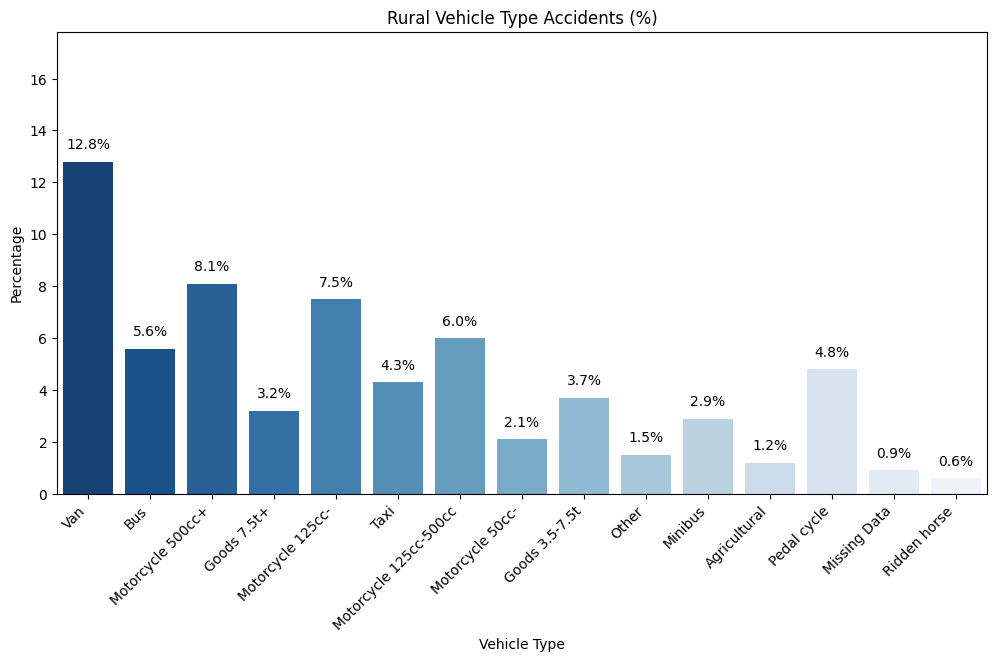

In [77]:
vehicle_types = [
 "Van", "Bus", "Motorcycle 500cc+", "Goods 7.5t+", "Motorcycle 125cc-", 
    "Taxi", "Motorcycle 125cc-500cc", "Motorcycle 50cc-", "Goods 3.5-7.5t", 
    "Other", "Minibus", "Agricultural", "Pedal cycle", "Missing Data", "Ridden horse"
]

percentages = [  
     12.8, 5.6, 8.1, 3.2, 7.5, 4.3, 6.0, 2.1, 3.7,
    1.5, 2.9, 1.2, 4.8, 0.9, 0.6
]


plt.figure(figsize=(12, 6))
ax = sns.barplot(x=vehicle_types, y=percentages, palette="Blues_r")


for i, p in enumerate(percentages):
    ax.text(i, p + 0.5, f"{p}%", ha='center', fontsize=10)


plt.xticks(rotation=45, ha="right")
plt.ylabel("Percentage")
plt.xlabel("Vehicle Type")
plt.title("Rural Vehicle Type Accidents (%)")
plt.ylim(0, max(percentages) + 5) 
plt.show()

<div style="width: 100%; height: 20px; background-color: green;"></div>

<h1>Correlations</h1>

<p style="font-size: 17px; font-weight: bold;">16. Does the number of vehicles have relationship to the number of casualties?</p>

In [78]:
UK_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [79]:
severity_casualty_corr = UK_accident['Number_of_Casualties'].corr(UK_accident['Number_of_Vehicles'])
print("Correlation between Number of casualties and number of vehicles:", np.round(severity_casualty_corr,2))
print("This suggests that the correlation is weak, meaning the number of vehicles does not directly determine the number of casualties.")

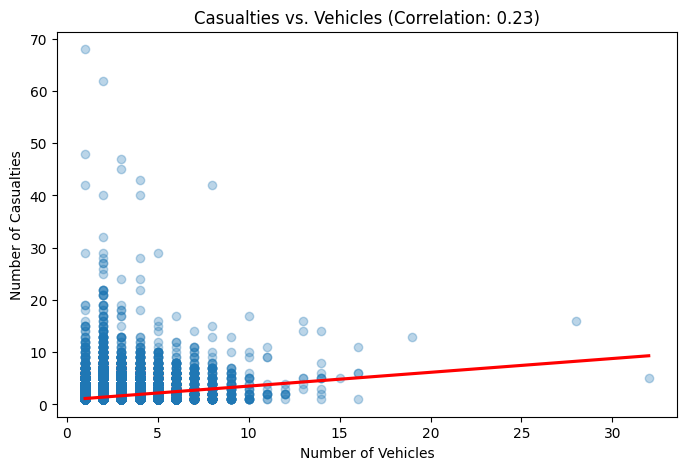

In [80]:
num_vehicles = UK_accident['Number_of_Vehicles']
num_casualties = UK_accident['Number_of_Casualties']


plt.figure(figsize=(8, 5))
sns.regplot(x=num_vehicles, y=num_casualties, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})


severity_casualty_corr = num_casualties.corr(num_vehicles)
plt.title(f"Casualties vs. Vehicles (Correlation: {np.round(severity_casualty_corr, 2)})")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.show()

<div style="width: 100%; height: 20px; background-color: green;"></div>

<p style="font-size: 17px; font-weight: bold;">17.Does the area type (urban or rural) significantly affect the number of casualties in accidents?</p>

In [81]:
urban_casualties=np.round(UK_accident[UK_accident['Urban_or_Rural_Area']=="Urban"]["Number_of_Casualties"],1)
rural_casualties=np.round(UK_accident[UK_accident['Urban_or_Rural_Area']=="Rural"]['Number_of_Casualties'],1)



In [82]:
cv,p_value=f_oneway(urban_casualties,rural_casualties)

In [83]:
if p_value > 0.5:
    print(p_value, 'strong correlation')
elif p_value < 0.5:
    print(p_value, 'weak correlation')

In [84]:
print(
    "The analysis reveals a weak correlation between the area type (urban or rural) and the number of casualties. "
    "While there is a statistically significant difference in casualty numbers between urban and rural areas, "
    "the magnitude of this difference is small and lacks practical importance. "
    "This suggests that whether an area is urban or rural has limited influence on the number of casualties. "
    "Other factors, such as road conditions, vehicle types, or driver behavior, may play a more significant role "
    "in determining accident severity and should be explored further."
)

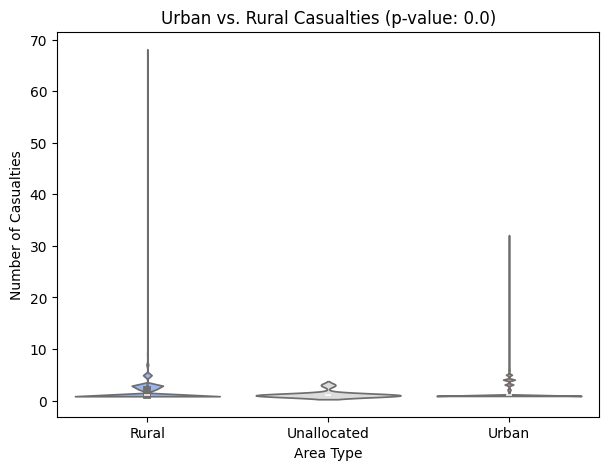

In [85]:
plt.figure(figsize=(7,5))
sns.violinplot(x=UK_accident['Urban_or_Rural_Area'], y=UK_accident['Number_of_Casualties'], palette="coolwarm")
plt.title(f"Urban vs. Rural Casualties (p-value: {np.round(p_value, 3)})")
plt.xlabel("Area Type")
plt.ylabel("Number of Casualties")
plt.show()


<div style="width: 100%; height: 20px; background-color: green;"></div>

<h1>Accidents Severity and Casualties</h1>

<p style="font-size: 17px; font-weight: bold;">18.Distribution of casualties in accidents severity</p>

In [86]:
total_casualties = UK_accident['Number_of_Casualties'].sum()
severity_counts = UK_accident.groupby('Accident_Severity')['Number_of_Casualties'].sum()

In [87]:
output_severity_percentages = (
    f"### Casualty Severity Distribution (as a percentage of total casualties):\n\n"
    f"- **{np.round((severity_counts['Slight'] / total_casualties) * 100, 1)}%** - Slight\n"
    f"- **{np.round((severity_counts['Serious'] / total_casualties) * 100, 1)}%** - Serious\n"
    f"- **{np.round((severity_counts['Fatal'] / total_casualties) * 100, 1)}%** - Fatal\n\n"
    f"---\n"
    f"### **Conclusion on Severity Distribution:**\n"
    f"The number of slight accident casualties is {severity_counts['Slight']}, which is significantly higher "
    f"compared to serious accidents **({severity_counts['Serious']})** and fatal accidents ({severity_counts['Fatal']})."
)

display(Markdown(output_severity_percentages))

### Casualty Severity Distribution (as a percentage of total casualties):

- **83.7%** - Slight
- **14.4%** - Serious
- **1.8%** - Fatal

---
### **Conclusion on Severity Distribution:**
The number of slight accident casualties is 750646, which is significantly higher compared to serious accidents **(129439)** and fatal accidents (16483).

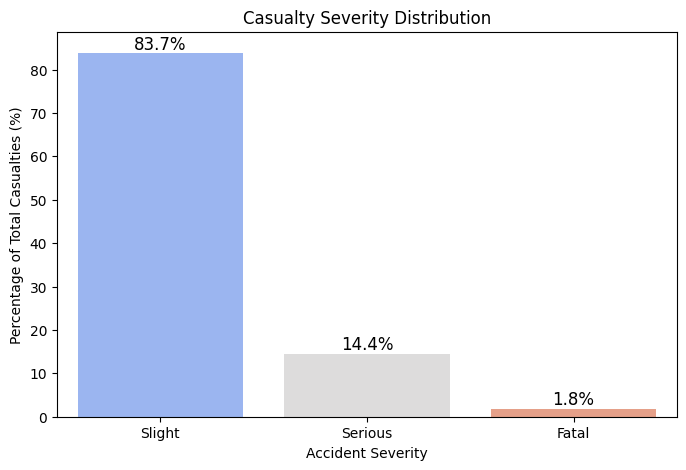

In [88]:
severity_percentages = {
    "Slight": (severity_counts['Slight'] / total_casualties) * 100,
    "Serious": (severity_counts['Serious'] / total_casualties) * 100,
    "Fatal": (severity_counts['Fatal'] / total_casualties) * 100
}


severity_df = pd.DataFrame(list(severity_percentages.items()), columns=['Severity', 'Percentage'])


plt.figure(figsize=(8, 5))
sns.barplot(x='Severity', y='Percentage', data=severity_df, palette="coolwarm")


plt.xlabel("Accident Severity")
plt.ylabel("Percentage of Total Casualties (%)")
plt.title("Casualty Severity Distribution")


for index, row in severity_df.iterrows():
    plt.text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%", ha='center', fontsize=12)

plt.ylim(0, max(severity_df['Percentage']) + 5)
plt.show()

<div style="width: 100%; height: 20px; background-color: green;"></div>

<p style="font-size: 17px; font-weight: bold;">19.Correlation Between Number of Casualties and Accident Severity</p>

In [89]:
from scipy.stats import pearsonr

In [90]:
severity_mapping = {"Slight": 1, "Serious": 2, "Fatal": 3}
UK_accident['Severity_Numeric'] = UK_accident['Accident_Severity'].map(severity_mapping)
correlation, p_value = pearsonr(UK_accident['Number_of_Casualties'], UK_accident['Severity_Numeric'])

In [91]:
output_correlation_casualties_severity = (
    f"### Correlation Between Number of Casualties and Accident Severity:\n\n"
    f"- **Correlation Coefficient**: {correlation:.2f}\n"
    f"- **P-value**: {p_value:.3f}\n\n"
    f"---\n"
    f"### **Conclusion on Casualties vs Severity Correlation:**\n"
    f"- There is a {'moderate' if 0.3 <= abs(correlation) < 0.7 else 'weak' if abs(correlation) < 0.3 else 'strong'} "
    f"positive correlation ({correlation:.2f}) between the number of casualties and accident severity.\n"
    f"- This suggests that more severe accidents tend to involve more casualties.\n"
    f"- The correlation is statistically significant (p-value = {p_value:.3f}).\n")
display(Markdown(output_correlation_casualties_severity))

### Correlation Between Number of Casualties and Accident Severity:

- **Correlation Coefficient**: 0.09
- **P-value**: 0.000

---
### **Conclusion on Casualties vs Severity Correlation:**
- There is a weak positive correlation (0.09) between the number of casualties and accident severity.
- This suggests that more severe accidents tend to involve more casualties.
- The correlation is statistically significant (p-value = 0.000).


In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x=UK_accident['Number_of_Casualties'], y=UK_accident['Severity_Numeric'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})


plt.xlabel("Number of Casualties")
plt.ylabel("Accident Severity (1=Slight, 2=Serious, 3=Fatal)")
plt.title(f"Correlation Between Number of Casualties and Severity\n(r = {correlation:.2f}, p = {p_value:.3f})")

plt.show()


<div style="width: 100%; height: 20px; background-color: green;"></div>

<p style="font-size: 17px; font-weight: bold;">20.What Percentage of Casualties does car have in slight accident?</p>

In [ ]:
casualties_slight_vehicle = UK_slight.groupby("Vehicle_Type")["Number_of_Casualties"].sum()

In [ ]:
casualties_slight_vehicle.sort_values(ascending=False)

In [ ]:
vehicle_types = [
     "Van / Goods 3.5 tonnes mgw or under", "Bus or coach (17 or more pass seats)",
    "Motorcycle over 500cc", "Goods 7.5 tonnes mgw and over", "Motorcycle 125cc and under",
    "Taxi/Private hire car", "Motorcycle over 125cc and up to 500cc", "Motorcycle 50cc and under",
    "Goods over 3.5t. and under 7.5t", "Other vehicle", "Minibus (8 - 16 passenger seats)",
    "Agricultural vehicle", "Pedal cycle", "Data missing or out of range", "Ridden horse"
]

casualty_counts = [
     38622, 29268, 29260, 19641, 17079, 15250, 8641, 8575,
    6855, 6297, 2211, 2160, 211, 9, 5
]


total_casualties = sum(casualty_counts) +566562 
percentages = [(count / total_casualties) * 100 for count in casualty_counts]


vehicle_types = pd.DataFrame({"Vehicle Type": vehicle_types, "Casualties": casualty_counts, "Percentage": percentages})


plt.figure(figsize=(10, 6))
ax = sns.barplot(y="Vehicle Type", x="Casualties", data=vehicle_types, palette="Blues_r")


for index, row in vehicle_types.iterrows():
    ax.text(row["Casualties"] + 200, index, f"{row['Percentage']:.1f}%", va='center', fontsize=10)


plt.xlabel("Number of Casualties in Slight Accident")
plt.title("Casualties by Vehicle Type in Slight Accident")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

In [ ]:
print(f"Car has most casualties having 566562 casualties whis is {np.round(566562/750646 *100,1)}% of total casualties in slight accident..")